In [1]:
#1. lectura de datos 
datos <- read.csv("fci_students.csv",header=TRUE,sep=";",dec=",")
datos[1:10,]


student_id,start_year,start_year_mod,program_id,reprobadas_sem1,aprobadas_sem1,anuladas_sem1,cursadas_sem1,cursadas_sem3,gpa_sem1,Permanencia
00949132a43fb01342e71b82fd7e46,2018,0,1807,0,6,0,6,5,4.80,1
043d2f89c95055115a73b0b7095d24,2017,0,1740,6,0,0,6,0,1.00,1
053fcec6c777193754ab8313f7ed9f,2018,0,1807,0,8,0,8,5,5.05,1
098ca3cd792b1aeb880afad52f8005,2017,0,1736,1,9,0,10,4,4.36,0
098ddd38e641cb7a2d0003de9638d7,2017,0,1807,1,4,1,6,5,4.65,1
09fffde5d88320d2664aebc7219403,2018,0,1737,0,6,0,6,6,5.48,1
0a1c99873b1bf84931803cb077f129,2020,1,1708,0,4,1,5,4,5.87,1
0bb806ca96706e9790d92a9d27aa2f,2021,1,1807,0,11,0,11,10,5.35,1
0c4a55a4ed9914b153b4867301f993,2020,1,1807,0,11,0,11,10,5.58,0
0fe5ab4f3df38493e8cc71afe37e45,2017,0,1708,3,2,0,5,6,3.59,1


In [6]:
probit: tratam. variable causal explicita, metodo no esta suponiendo relacion lineal

logit: más general

BART: general, debe adaptarse mejor

como se compara bart con regresion logistica o probit

prueba de mejora o no de modelo agregando y sacando variable "dudosa"

adecuar datos para los dos modelos, definir entrenamiento y test 70-30

usar parámetro n-tree


ERROR: Error in parse(text = x, srcfile = src): <text>:1:17: unexpected symbol
1: probit: tratam. variable
                    ^


In [3]:
#2. análisis exploratorio de datos:

dim(datos)
summary(datos)


[1] 2028   11

                          student_id     start_year   start_year_mod  
 004d6a77c956dea2e94c18f8f3965d:   1   Min.   :2017   Min.   :0.0000  
 0050b3d80b41ade5455e8f87d47d9b:   1   1st Qu.:2017   1st Qu.:0.0000  
 008419d0eb1f05d4050a9754dc6043:   1   Median :2018   Median :0.0000  
 00949132a43fb01342e71b82fd7e46:   1   Mean   :2019   Mean   :0.4532  
 00a4082a181ca3ed3ece8f039c7d76:   1   3rd Qu.:2020   3rd Qu.:1.0000  
 00b766201f72e60666f22c02317a5d:   1   Max.   :2021   Max.   :1.0000  
 (Other)                       :2022                                  
   program_id   reprobadas_sem1  aprobadas_sem1   anuladas_sem1   
 Min.   :1704   Min.   : 0.000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:1708   1st Qu.: 0.000   1st Qu.: 3.000   1st Qu.:0.0000  
 Median :1737   Median : 1.000   Median : 5.000   Median :0.0000  
 Mean   :1751   Mean   : 1.401   Mean   : 4.903   Mean   :0.1272  
 3rd Qu.:1779   3rd Qu.: 2.000   3rd Qu.: 6.000   3rd Qu.:0.0000  
 Max.   :1822   Max.   :10.000

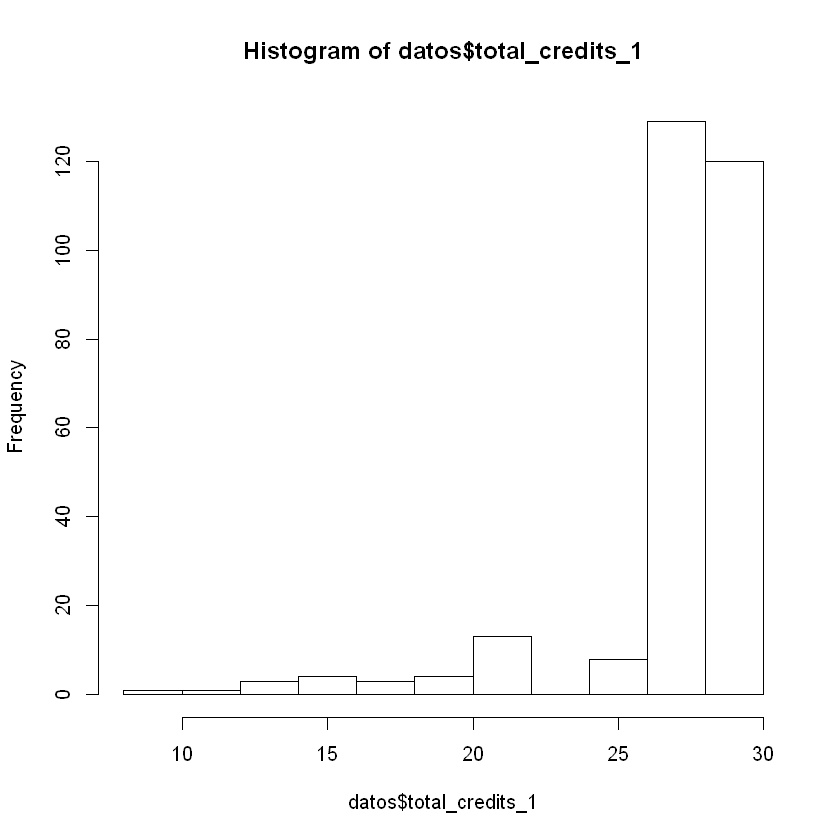

In [34]:
hist(datos$total_credits_1)

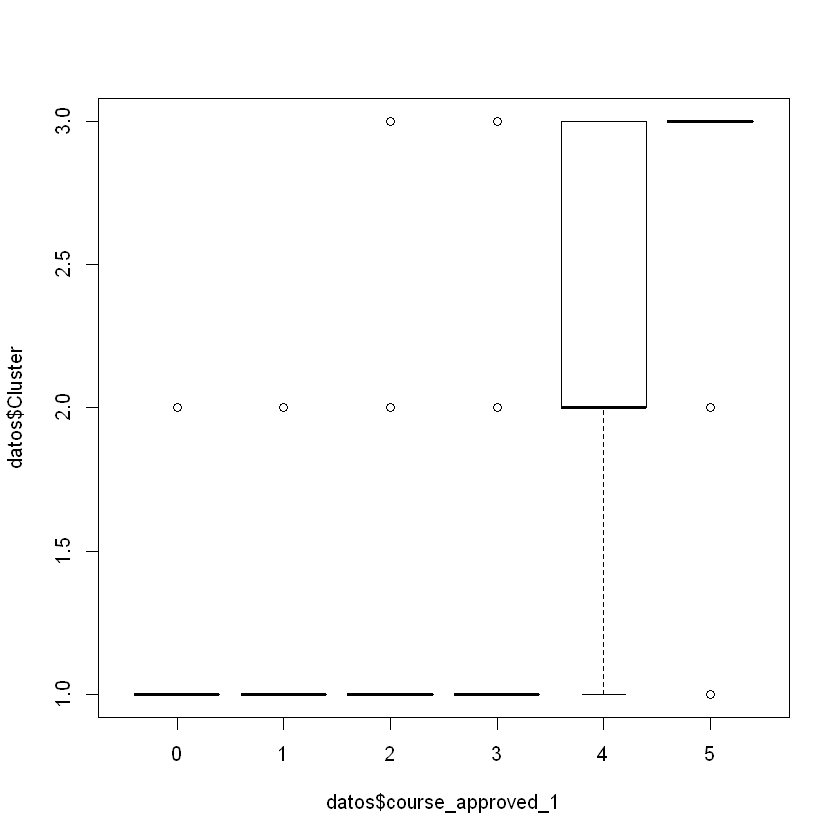

In [35]:

boxplot(datos$Cluster ~ datos$course_approved_1)

In [4]:
install.packages("corrplot")
library("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'


corrplot 0.92 loaded



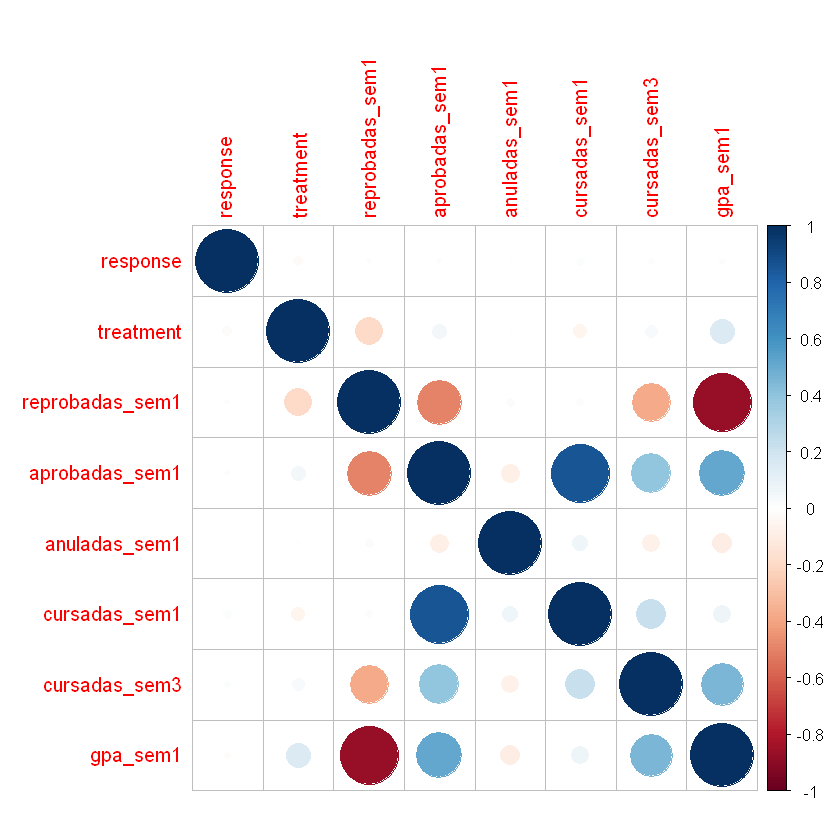

In [5]:
#definición de variables
response<-datos[,11]
treatment <- datos[,3]
confounders <- datos[,5:10]



dataT <- cbind(response,treatment,confounders)
corDatos <- cor(dataT)
corrplot(corDatos)


In [6]:
#análisis de independencia respuesta vs tratamiento
tab <- table(response, treatment)
print(tab)
chisq.test(cbind(as.factor(response),as.factor(treatment)))

        treatment
response   0   1
       0 185 171
       1 924 748


Warning message in chisq.test(cbind(as.factor(response), as.factor(treatment))):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  cbind(as.factor(response), as.factor(treatment))
X-squared = 283.33, df = 2027, p-value = 1


In [7]:
#3. Ajuste de regresión logística para comparar resultados de bartc

y= as.factor(response)
z = as.factor(treatment)
summary(confounders)
x1 = confounders[,1]
x2 = confounders[,2]
x3 = confounders[,4]
x4 = confounders[,5]
x5 = confounders[,6]
res2 <- glm(y ~ z  +x2+x5+x3+x4+x1,family=binomial(link="probit"))
summary(res2)

 reprobadas_sem1  aprobadas_sem1   anuladas_sem1    cursadas_sem1   
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.: 6.000  
 Median : 1.000   Median : 5.000   Median :0.0000   Median : 6.000  
 Mean   : 1.401   Mean   : 4.903   Mean   :0.1272   Mean   : 6.431  
 3rd Qu.: 2.000   3rd Qu.: 6.000   3rd Qu.:0.0000   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :55.000   Max.   :6.0000   Max.   :56.000  
 cursadas_sem3       gpa_sem1    
 Min.   : 0.000   Min.   :0.000  
 1st Qu.: 3.000   1st Qu.:3.900  
 Median : 5.000   Median :4.650  
 Mean   : 4.272   Mean   :4.479  
 3rd Qu.: 6.000   3rd Qu.:5.220  
 Max.   :30.000   Max.   :6.680  


Call:
glm(formula = y ~ z + x2 + x5 + x3 + x4 + x1, family = binomial(link = "probit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0145   0.5901   0.6105   0.6388   0.6934  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.01557    0.34245   2.966  0.00302 **
z1          -0.06777    0.06705  -1.011  0.31213   
x2          -0.01877    0.08222  -0.228  0.81940   
x5          -0.03340    0.06622  -0.504  0.61403   
x3           0.02836    0.08197   0.346  0.72934   
x4           0.01050    0.01438   0.730  0.46510   
x1          -0.02609    0.08709  -0.300  0.76451   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1884.3  on 2027  degrees of freedom
Residual deviance: 1881.5  on 2021  degrees of freedom
AIC: 1895.5

Number of Fisher Scoring iterations: 4


In [8]:
# 4. Ajuste de modelo bayesiano de arboles aditivos con causalidad

install.packages("bartCause")



  There is a binary version available but the source version is later:
          binary source needs_compilation
bartCause  1.0-4  1.0-6             FALSE



installing the source package 'bartCause'




In [9]:
library(bartCause)

In [10]:

confounders <-cbind(x1,x2,x3,x4,x5)

In [11]:

res <- bartc(response, treatment,confounders,method.rsp="bart",n.samples = 100L, n.burn = 15L, n.chains = 2L,verbose=TRUE)

fitting treatment model via method 'bart'
fitting response model via method 'bart'


In [12]:
summary(res)

Call: bartc(response = response, treatment = treatment, confounders = confounders, 
            method.rsp = "bart", verbose = TRUE, n.samples = 100L, n.burn = 15L, 
            n.chains = 2L)

Causal inference model fit by:
  model.rsp: bart
  model.trt: bart

Treatment effect (population average):
    estimate      sd ci.lower ci.upper
ate -0.01978 0.01985 -0.05868  0.01912
Estimates fit from 2028 total observations
95% credible interval calculated by: normal approximation
  population TE approximated by: posterior predictive distribution
Result based on 100 posterior samples times 2 chains

In [13]:
fitted(res)

[1] -0.02112426

In [14]:
length(extract(res))

[1] 200

In [15]:
summary(extract(res))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.074458 -0.034024 -0.021943 -0.021124 -0.007766  0.026134 

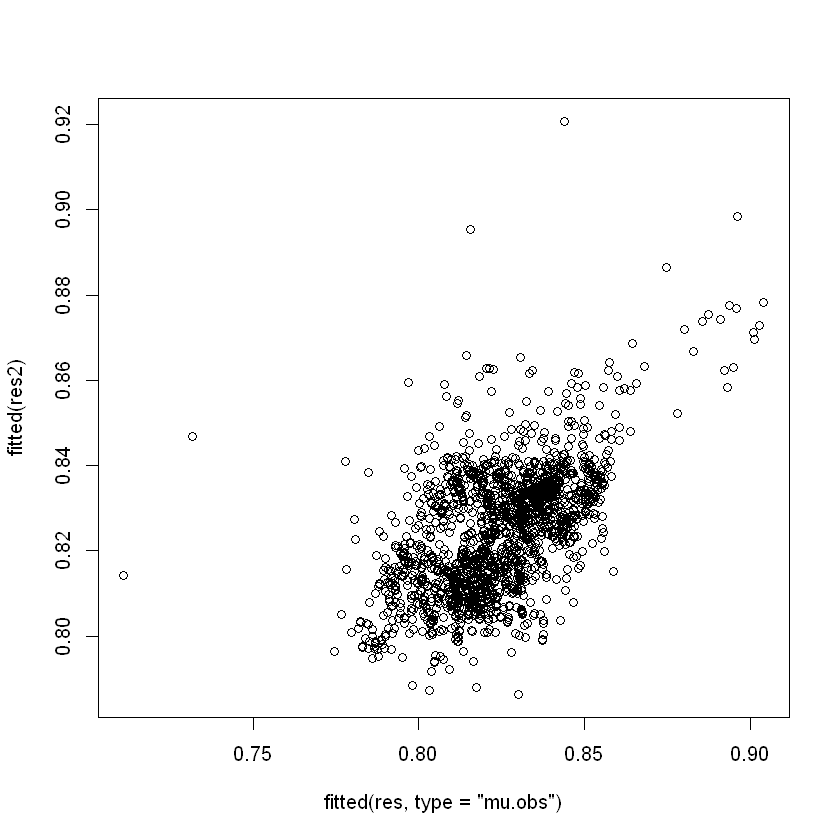

In [16]:
plot(fitted(res, type = "mu.obs"), fitted(res2))


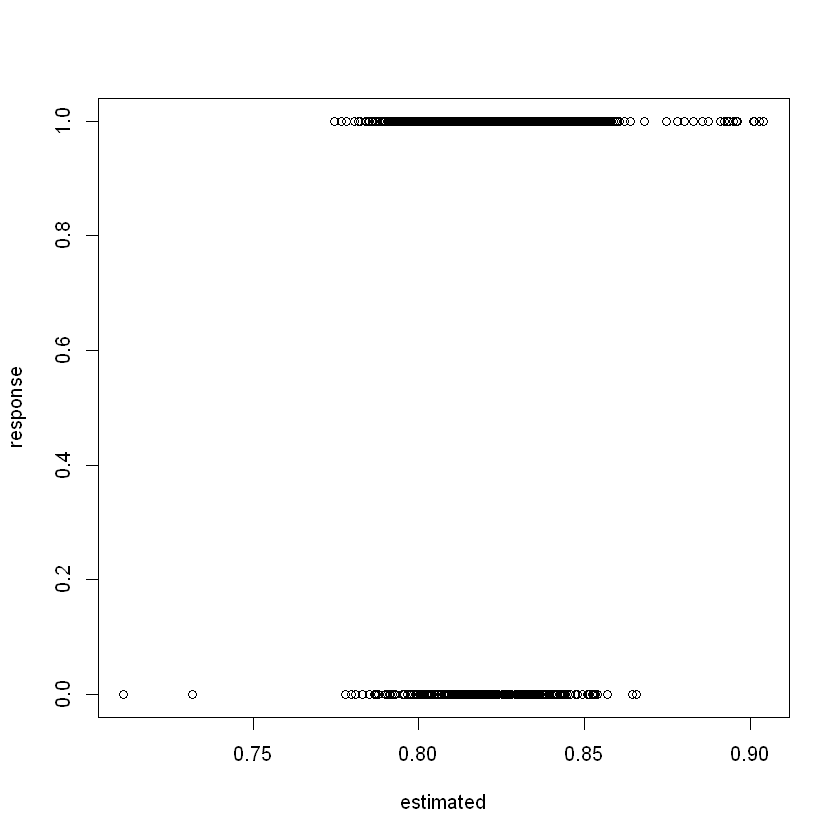

In [17]:
estimated<- fitted(res, type = "mu.obs")
plot(estimated, response)

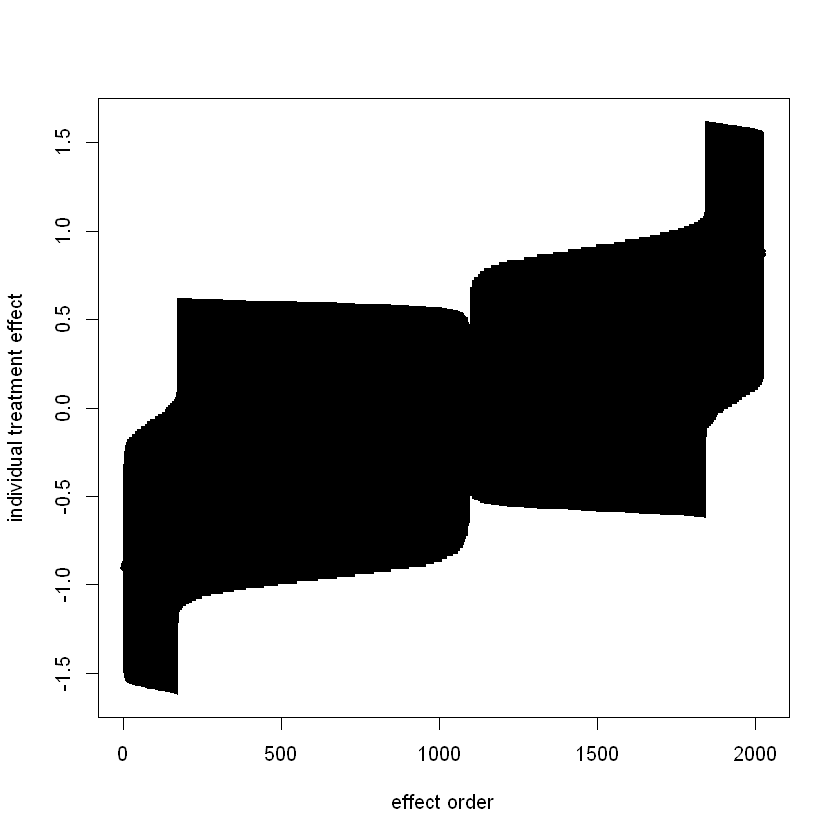

In [18]:
ites<- extract(res, type = "ite")
#ites <- ites[,z[]==]
ite.m  <- apply(ites, 2, mean)
ite.sd <- apply(ites, 2, sd)
ite.lb <- ite.m - 2 * ite.sd
ite.ub <- ite.m + 2 * ite.sd

ite.o <- order(ite.m)

plot(NULL, type = "n",
     xlim = c(1, length(ite.m)), ylim = range(ite.lb, ite.ub),
     xlab = "effect order", ylab = "individual treatment effect")
lines(rbind(seq_along(ite.m), seq_along(ite.m), NA),
      rbind(ite.lb[ite.o], ite.ub[ite.o], NA), lwd = 0.5)
points(seq_along(ite.m), ite.m[ite.o], pch = 20)

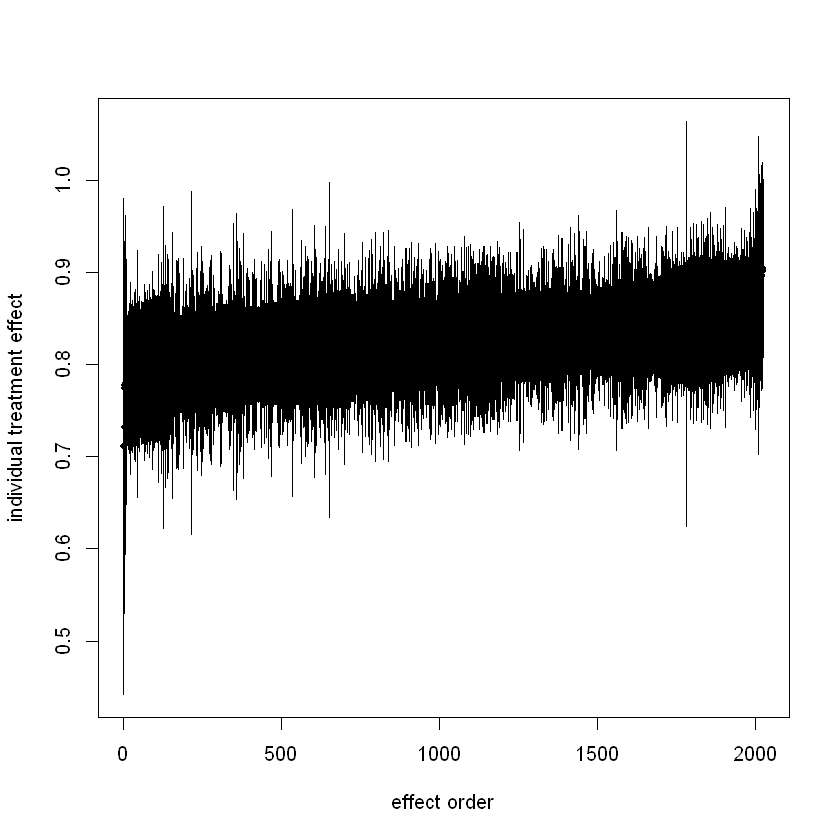

In [19]:
ites<- extract(res, type = "mu.obs")
#ites <- ites[,z[]==0]
ite.m  <- apply(ites, 2, mean)
ite.sd <- apply(ites, 2, sd)
ite.lb <- ite.m - 2 * ite.sd
ite.ub <- ite.m + 2 * ite.sd

ite.o <- order(ite.m)

plot(NULL, type = "n",
     xlim = c(1, length(ite.m)), ylim = range(ite.lb, ite.ub),
     xlab = "effect order", ylab = "individual treatment effect")
lines(rbind(seq_along(ite.m), seq_along(ite.m), NA),
      rbind(ite.lb[ite.o], ite.ub[ite.o], NA), lwd = 0.5)
points(seq_along(ite.m), ite.m[ite.o], pch = 20)

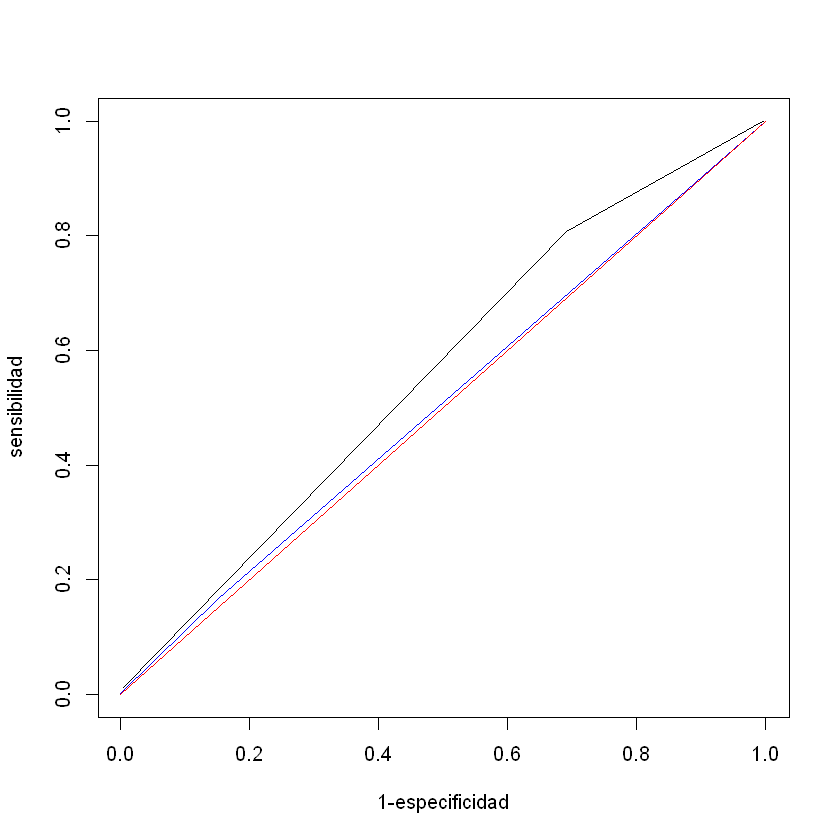

In [20]:
prob1 = fitted(res, type="mu.obs")
prob2 = fitted(res2)
p1=matrix(0,nrow=50,ncol=3)
p2=matrix(0,nrow=50,ncol=3)
i=1
for(p in seq(min(prob1),max(prob1),.05)){
    t1=table(prob1>p,as.factor(dataT$response))
    p1[i,]=c(p,(t1[2,2])/sum(t1[,2]),(t1[1,1])/sum(t1[,1]))
    i=i+1
}

j=1
for(p in seq(min(prob2),max(prob2),.05)){
    t2=table(prob2>p,as.factor(dataT$response))
    p2[j,]=c(p,(t2[2,2])/sum(t2[,2]),(t2[1,1])/sum(t2[,1]))
    j=j+1
}

plot(1-p1[1:i-1,3],p1[1:i-1,2],type="l",xlab="1-especificidad",ylab="sensibilidad",ylim=c(0,1))
lines(1-p2[1:j-1,3],p2[1:j-1,2],col="blue")
lines(c(0,1),c(0,1),col="red")

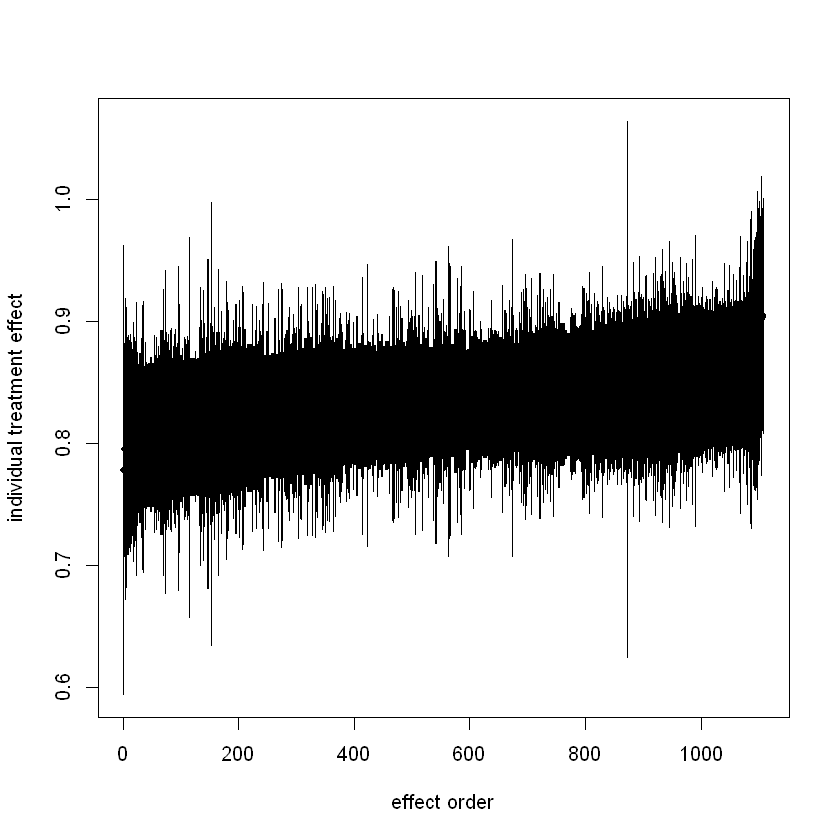

In [21]:
ites<- extract(res, type = "mu.obs")
ites <- ites[,z[]==0]
ite.m  <- apply(ites, 2, mean)
ite.sd <- apply(ites, 2, sd)
ite.lb <- ite.m - 2 * ite.sd
ite.ub <- ite.m + 2 * ite.sd

ite.o <- order(ite.m)

plot(NULL, type = "n",
     xlim = c(1, length(ite.m)), ylim = range(ite.lb, ite.ub),
     xlab = "effect order", ylab = "individual treatment effect")
lines(rbind(seq_along(ite.m), seq_along(ite.m), NA),
      rbind(ite.lb[ite.o], ite.ub[ite.o], NA), lwd = 0.5)
points(seq_along(ite.m), ite.m[ite.o], pch = 20)